In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/manual-daily-temperature/MaunaLoaDailyTemps.csv


In [2]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np


In [4]:
df=pd.read_csv('/kaggle/input/manual-daily-temperature/MaunaLoaDailyTemps.csv' , index_col = 'DATE' ,parse_dates =True)
df=df.dropna()
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [5]:
df.shape
X = df.values
print(X)

[[  33.   46.   40.  657. 1756.]
 [  35.   50.   43.  657. 1756.]
 [  36.   45.   41.  657. 1757.]
 ...
 [  33.   47.   40.  655. 1753.]
 [  36.   47.   42.  655. 1753.]
 [  39.   52.   46.  656. 1754.]]


<Axes: xlabel='DATE'>

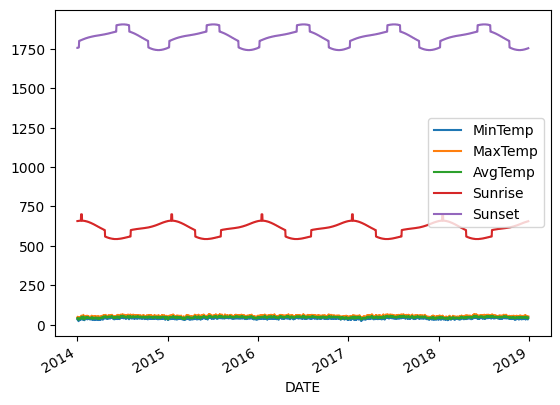

In [6]:
df.plot()

<Axes: xlabel='DATE'>

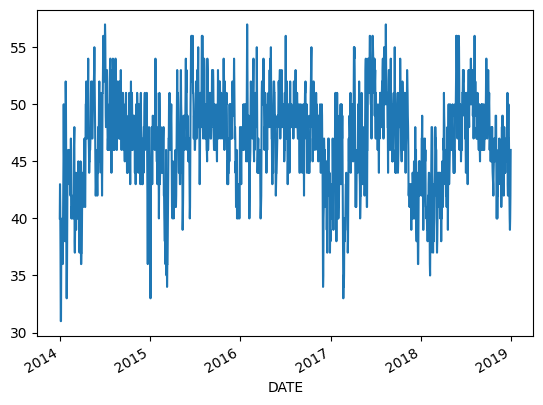

In [7]:
df['AvgTemp'].plot()

In [8]:
from statsmodels.tsa.stattools import adfuller
def adf(dataset):
    dftest=adfuller(dataset,autolag= 'AIC' )
    print("1. ADF:" ,dftest[0])
    print("2. P-Value:" , dftest[1])
    print("3. Num of Lags: ",dftest[2])
    print("4. Num of Observations:" ,dftest[3])
    print("5. Critical Values:")
    for key,val in dftest[4].items():
        print(key,':',val)

In [9]:
adf(df['AvgTemp'])

1. ADF: -6.5546801250687805
2. P-Value: 8.675937480199557e-09
3. Num of Lags:  12
4. Num of Observations: 1808
5. Critical Values:
1% : -3.433972018026501
5% : -2.8631399192826676
10% : -2.5676217442756872


THE P-VALUE SCORE IS VERY MUCH LESS THAN 0.05, THUS THE GIVEN DATASET IS STATIONARY

In [10]:
from pmdarima import auto_arima
import warnings 
warnings.filterwarnings("ignore")


In [11]:
s_fit=auto_arima(df['AvgTemp'],trace=True,suppress_warnings=True)
s_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.735, Time=1.83 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.50 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=1.60 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.311, Time=3.97 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.337, Time=4.01 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=3.93 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.577, Time=4.73 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.293, Time=5.14 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.636, Time=6.16 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.397, Time=5.51 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.770
Date:                Sat, 27 Jul 2024   AIC                           8295.539
Time:                        10:19:06   BIC                           8339.596
Sample:                             0   HQIC                          8311.793
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3434      0.395      3.404      0.001       0.570       2.117
ar.L1          0.9712      0.008    114.337      0.000       0.955       0.988
ma.L1         -0.1239      0.024     -5.152      0.000      -0.171      -0.077
ma.L2         -0.2172      0.024     -8.875      0.000      -0.265      -0.169
ma.L3         -0.2038      0.024     -8.429      0.000      -0.251      -0.156
ma.L4         -0.1353      0.023     -5.894      0.000      -0.180      -0.090
ma.L5         -0.0464      0.025     -1.892      0.059      -0.095       0.002
sigma2         5.5300      0.174     31.762      0.000       5.189       5.871
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                21.30
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.18
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
from statsmodels.tsa.arima.model import ARIMA

In [13]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)


(1821, 5)
(1791, 5) (30, 5)


In [14]:
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Sat, 27 Jul 2024   AIC                           8156.395
Time:                        10:19:09   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.0

In [15]:
start=len(train)
end=len(train)+len(test)-1

pred=model.predict(start=len(train),end=len(train)+len(test)-1,typ ='levels')
#print(pred)
pred.index=df.index[start:end+1]
print(pred)

DATE
2018-12-01    44.754109
2018-12-02    44.987795
2018-12-03    45.388741
2018-12-04    45.721546
2018-12-05    45.863733
2018-12-06    45.874127
2018-12-07    45.884370
2018-12-08    45.894467
2018-12-09    45.904418
2018-12-10    45.914225
2018-12-11    45.923892
2018-12-12    45.933419
2018-12-13    45.942809
2018-12-14    45.952064
2018-12-15    45.961186
2018-12-16    45.970176
2018-12-17    45.979037
2018-12-18    45.987770
2018-12-19    45.996378
2018-12-20    46.004861
2018-12-21    46.013223
2018-12-22    46.021464
2018-12-23    46.029586
2018-12-24    46.037592
2018-12-25    46.045482
2018-12-26    46.053259
2018-12-27    46.060923
2018-12-28    46.068478
2018-12-29    46.075923
2018-12-30    46.083262
Name: predicted_mean, dtype: float64


<Axes: xlabel='DATE'>

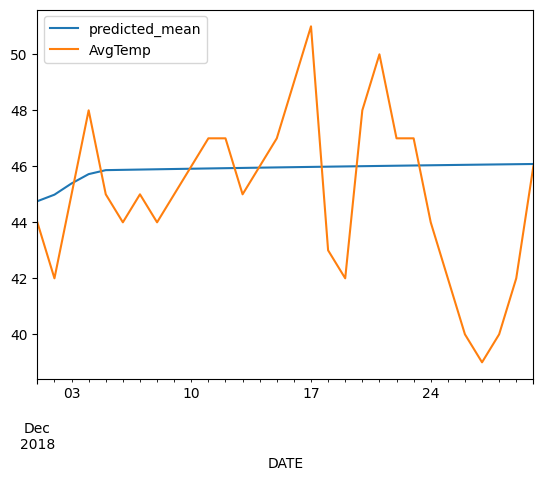

In [16]:
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['AvgTemp'],pred))
print(rmse)

3.0004640546117467


In [25]:
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
print(model2.summary())
df.tail()

                               SARIMAX Results                                
Dep. Variable:                AvgTemp   No. Observations:                 1821
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4138.130
Date:                Sat, 27 Jul 2024   AIC                           8292.261
Time:                        10:35:37   BIC                           8336.318
Sample:                             0   HQIC                          8308.514
                               - 1821                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5285      0.758     61.403      0.000      45.043      48.014
ar.L1          0.9860      0.005    192.908      0.000       0.976       0.996
ma.L1         -0.1403      0.023     -6.125      0.0

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [40]:

pred2=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#pred2.index=pd.date_range(start='2018-12-30' , end='2019-12-29')
print(pred2)


1821    46.418166
1822    46.113912
1823    45.617874
1824    45.249566
1825    45.116916
1826    45.136666
1827    45.156141
1828    45.175342
1829    45.194275
1830    45.212943
1831    45.231350
1832    45.249499
1833    45.267395
1834    45.285040
1835    45.302438
1836    45.319592
1837    45.336507
1838    45.353185
1839    45.369629
1840    45.385844
1841    45.401831
1842    45.417595
1843    45.433139
1844    45.448465
1845    45.463576
1846    45.478476
1847    45.493167
1848    45.507653
1849    45.521936
1850    45.536020
1851    45.549906
Name: ARIMA Predictions, dtype: float64


<Axes: >

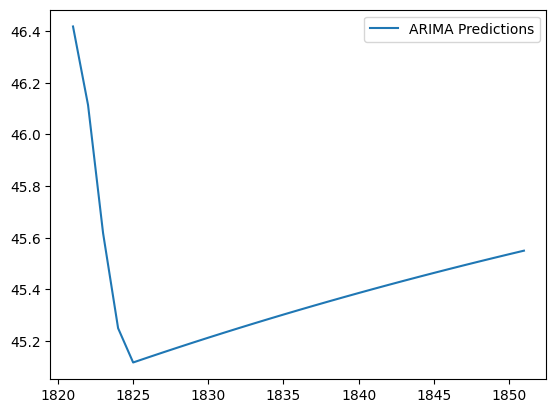

In [41]:
pred2.plot(legend=True)